# 1. Prepare Geographical Data

Get the list of districts of Toronto with Postal Codes. Load first table from wiki-page 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' into dataframe df.

In [204]:
import pandas as pd

tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df = pd.DataFrame(tables[0])
df.rename(columns={'Postal code':'Postal Code'}, inplace=True)
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


Remove rows with Borough value 'Not assigned' from dataframe

In [205]:
df = df[df['Borough'] != 'Not assigned']
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


The shape of dataframe:

In [206]:
df.shape

(103, 3)

Load geographical coordinates for each postal code from http://cocl.us/Geospatial_data into dataframe coords

In [207]:
coords = pd.read_csv('http://cocl.us/Geospatial_data')
coords.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [208]:
ds = df.merge(coords, how='left')
ds.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494


# 2. Visualize Data on Maps

Install folium

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [209]:
import folium

Show Head Office location on map: [40.745554, -73.99415] (275 Seventh Ave, New York, NY).

In [210]:
#Geographical coordinates of Head Office
head_lat = 40.745554
head_lng = -73.99415

# create map of New York using latitude and longitude values
ny_map = folium.Map(location=[head_lat, head_lng], zoom_start=17)

# add marker to map
folium.CircleMarker(
    [head_lat, head_lng],
    radius=5,
    popup='Head Office of <b>XXX</b> company',
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(ny_map)     
    
ny_map

Show map of Toronto with all districts

In [211]:
# create map of Toronto using latitude and longitude values
t_map = folium.Map(location=[43.7001, -79.4163], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(ds['Latitude'], ds['Longitude'], ds['Borough'], ds['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(t_map)  
    
t_map

# 3. Explore and Analyze Neighorhoods in Toronto & of Head Office

Define Foursquare Credentials and Version

In [212]:
CLIENT_ID = 'W55WQMBNJ4LC1JXMYV112X0I3FSJPLBKBHHCBYBXC3GB30DZ' # your Foursquare ID
CLIENT_SECRET = 'C0CAN3C2INA2N2E3RPKKLAV3ALGGG2DAWCRDORWDBCT3DSRX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: W55WQMBNJ4LC1JXMYV112X0I3FSJPLBKBHHCBYBXC3GB30DZ
CLIENT_SECRET:C0CAN3C2INA2N2E3RPKKLAV3ALGGG2DAWCRDORWDBCT3DSRX


Add Head Office coordinates to Toronto districts dataframe to explore neighborhoods of all districts of Toronto and Head Office

In [213]:
row = {'Postal Code':'XXX', 'Borough': 'XXX', 'Neighborhood': 'Head Office', 'Latitude': head_lat, 'Longitude': head_lng}
#all_ds = ds.append(row, ignore_index=True)
all_ds.tail()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business reply mail Processing CentrE,43.662744,-79.321558
101,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...,43.636258,-79.498509
102,M8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...,43.628841,-79.520999
103,XXX,XXX,Head Office,40.745554,-73.994150


Get top 100 venues within a radius of 1000 meters for all neighborhoods into dataframe all_venues

In [214]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=500, limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

all_venues = getNearbyVenues(names=all_ds['Neighborhood'],
                            latitudes=all_ds['Latitude'],
                            longitudes=all_ds['Longitude'],
                            radius=1000
                            )

all_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café
3,Parkwoods,43.753259,-79.329656,A&W,43.760643,-79.326865,Fast Food Restaurant
4,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,43.746143,-79.324630,Grocery Store


Create dataframe with venue categories as columns

In [216]:
# one hot encoding
onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = all_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Zoo,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [217]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped.head()

,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000000,0.02439,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,Alderwood / Long Branch,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2,Bathurst Manor / Wilson Heights / Downsview North,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.035714,0.00000,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000,0.0,0.0
4,Bedford Park / Lawrence Manor East,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,...,0.0,0.025000,0.00000,0.0,0.0,0.0,0.0,0.025,0.0,0.0


In [218]:
grouped.tail()

,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
93,Willowdale / Newtonbrook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,York Mills / Silver Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Display the top 10 venues for each neighborhood in new dataframe

In [219]:
import numpy as np

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Shopping Mall,Bakery,Coffee Shop,Caribbean Restaurant,Pool,Supermarket,Latin American Restaurant,Sri Lankan Restaurant,Breakfast Spot
1,Alderwood / Long Branch,Pharmacy,Discount Store,Pizza Place,Convenience Store,Coffee Shop,Gas Station,Liquor Store,Park,Intersection,Dance Studio
2,Bathurst Manor / Wilson Heights / Downsview North,Bank,Convenience Store,Coffee Shop,Dog Run,Gas Station,Diner,Fried Chicken Joint,Sandwich Place,Sushi Restaurant,Supermarket
3,Bayview Village,Gas Station,Bank,Japanese Restaurant,Skating Rink,Chinese Restaurant,Park,Trail,Café,Shopping Mall,Grocery Store
4,Bedford Park / Lawrence Manor East,Italian Restaurant,Coffee Shop,Bank,Restaurant,Sandwich Place,Fast Food Restaurant,Bridal Shop,Pharmacy,Bakery,Intersection


Display the top 10 venues for the Head Office

In [220]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'] == 'Head Office']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Head Office,Gym / Fitness Center,Coffee Shop,Hotel,Korean Restaurant,Japanese Restaurant,American Restaurant,Cycle Studio,Yoga Studio,Beer Bar,Bookstore


# 4. Cluster Neighborhoods (including Head Office Neighborhood)

Try KMeans algorithm with different number of clusters

In [221]:
from sklearn.cluster import KMeans

# Save Head Office row
head_row = grouped[grouped['Neighborhood'] == 'Head Office']

# Remove Head Office row - only Toronto districts
grouped_toronto = grouped[grouped['Neighborhood'] != 'Head Office']

#Remove Neighborhood column
grouped_clustering = grouped_toronto.drop('Neighborhood', 1)

# run k-means clustering with different number of clusters
KN = 10
sse = {}
for k in range(1, KN):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=0).fit(grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

Visualize results

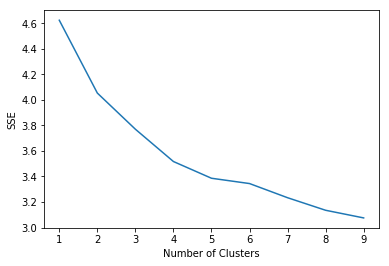

In [222]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

Using elbow method we can see that 3 clusters are optimal for KMeans method

Train KMeans object with 5 clusters

In [223]:
k_clusters = 5
kmeans = KMeans(n_clusters=k_clusters, init='random', n_init=10, random_state=0).fit(grouped_clustering)

Add cluster labels

In [224]:
ds_clusters = grouped_toronto
ds_clusters.insert(0, 'Cluster', kmeans.labels_)
ds_clusters['Cluster'] = round(ds_clusters['Cluster'])+1
ds_clusters = ds_clusters.merge(all_ds, how='left', on='Neighborhood')
ds_clusters.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Cluster,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,...,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Postal Code,Borough,Latitude,Longitude
0,2,Agincourt,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,M1S,Scarborough,43.794200,-79.262029
1,5,Alderwood / Long Branch,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,M8W,Etobicoke,43.602414,-79.543484
2,5,Bathurst Manor / Wilson Heights / Downsview North,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,M3H,North York,43.754328,-79.442259
3,5,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,M2K,North York,43.786947,-79.385975
4,3,Bedford Park / Lawrence Manor East,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,...,0.0,0.0,0.0,0.025,0.0,0.0,M5M,North York,43.733283,-79.419750


In [225]:
ds_clusters.tail()

,Cluster,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,...,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Postal Code,Borough,Latitude,Longitude
97,3,Willowdale / Newtonbrook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M2M,North York,43.789053,-79.408493
98,2,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M1G,Scarborough,43.770992,-79.216917
99,3,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M4C,East York,43.695344,-79.318389
100,1,York Mills / Silver Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M2L,North York,43.757490,-79.374714
101,5,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M2P,North York,43.752758,-79.400049


In [226]:
row2 = head_row.drop('Neighborhood', 1)
head_cluster = kmeans.predict(row2)[0]+1
print('Head Office belongs to Cluster {}'.format(head_cluster))

Head Office belongs to Cluster 3


In [227]:
head_row

,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
36,Head Office,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.02


Visualize the resulting clusters in Toronto. Target districts are marked with big circles

In [228]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[43.7001, -79.4163], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ds_clusters['Latitude'], ds_clusters['Longitude'], ds_clusters['Neighborhood'], ds_clusters['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    try:
        if int(cluster) == head_cluster:            
            folium.CircleMarker(
                [lat, lon],
                radius=10,
                popup=label,
                color='green',
                fill=True,
                fill_color=rainbow[int(cluster)-1],
                fill_opacity=0.7).add_to(map_clusters)
        else:
            folium.CircleMarker(
                [lat, lon],
                radius=5,
                popup=label,
                color=rainbow[int(cluster)-1],
                fill=True,
                fill_color=rainbow[int(cluster)-1],
                fill_opacity=0.7).add_to(map_clusters)
    except:
        pass
       
map_clusters

We should analyze and select office locations in following districts:

In [229]:
target_clusters = ds_clusters[ds_clusters['Cluster'] == head_cluster]
target_clusters

,Cluster,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,...,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Postal Code,Borough,Latitude,Longitude
4,3,Bedford Park / Lawrence Manor East,0.00,0.000000,0.00,0.000000,0.000000,0.025000,0.00,0.00,...,0.00,0.000000,0.0,0.025000,0.000000,0.000000,M5M,North York,43.733283,-79.419750
5,3,Berczy Park,0.00,0.000000,0.00,0.000000,0.000000,0.020000,0.00,0.00,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,M5E,Downtown Toronto,43.644771,-79.373306
6,3,Birch Cliff / Cliffside West,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,M1N,Scarborough,43.692657,-79.264848
7,3,Brockton / Parkdale Village / Exhibition Place,0.00,0.010000,0.00,0.000000,0.000000,0.010000,0.00,0.00,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,M6K,West Toronto,43.636847,-79.428191
8,3,Business reply mail Processing CentrE,0.00,0.000000,0.00,0.000000,0.000000,0.020833,0.00,0.00,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,M7Y,East Toronto,43.662744,-79.321558
9,3,CN Tower / King and Spadina / Railway Lands / ...,0.00,0.000000,0.00,0.066667,0.066667,0.000000,0.00,0.00,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,M5V,Downtown Toronto,43.628947,-79.394420
11,3,Canada Post Gateway Processing Centre,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,M7R,Mississauga,43.636966,-79.615819
13,3,Central Bay Street,0.00,0.000000,0.00,0.000000,0.000000,0.020000,0.00,0.00,...,0.00,0.010000,0.0,0.000000,0.000000,0.010000,M5G,Downtown Toronto,43.657952,-79.387383
14,3,Christie,0.00,0.000000,0.00,0.000000,0.000000,0.010000,0.00,0.00,...,0.00,0.010000,0.0,0.000000,0.000000,0.000000,M6G,Downtown Toronto,43.669542,-79.422564
15,3,Church and Wellesley,0.00,0.000000,0.00,0.000000,0.000000,0.010000,0.00,0.00,...,0.00,0.000000,0.0,0.010000,0.010000,0.020000,M4Y,Downtown Toronto,43.665860,-79.383160


The selected districts on map:

In [230]:
map_clusters2 = folium.Map(location=[43.7001, -79.4163], zoom_start=11)

for lat, lon, poi, cluster in zip(ds_clusters['Latitude'], ds_clusters['Longitude'], ds_clusters['Neighborhood'], ds_clusters['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    try:
        if cluster == head_cluster:            
            folium.CircleMarker(
                [lat, lon],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                #fill_color='blue',
                fill_opacity=0.7).add_to(map_clusters2)
    except:
        pass
       
map_clusters2

That's it!